In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Capstone C22-PC414/AllMainData.zip", "r")
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
TRAIN_DIR = "/tmp/AllMainData/TRAIN"
VAL_DIR  = "/tmp/AllMainData/VAL"

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Pass in the appropriate arguments to the flow_from_directory method
train_generator = train_datagen.flow_from_directory(directory=TRAIN_DIR,
                                    batch_size=32, 
                                    class_mode="binary",
                                    target_size=(224, 224))

# Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
# Remember that validation data should not be augmented
validation_datagen = ImageDataGenerator(rescale = 1./255.)

# Pass in the appropriate arguments to the flow_from_directory method
validation_generator = validation_datagen.flow_from_directory(directory=VAL_DIR,
                                            batch_size=32, 
                                            class_mode="binary",
                                            target_size=(224, 224))

Found 31523 images belonging to 3 classes.
Found 6423 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(3, activation = "softmax")
])


model.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=['accuracy']) 

In [ ]:
history = model.fit(train_generator,
                    epochs=3,
                    batch_size = 100,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/3
986/986 [==============================] - 587s 582ms/step - loss: 0.8474 - accuracy: 0.6298 - val_loss: 0.8009 - val_accuracy: 0.6125
Epoch 2/3
986/986 [==============================] - 564s 572ms/step - loss: 0.7309 - accuracy: 0.6791 - val_loss: 0.8257 - val_accuracy: 0.5940
Epoch 3/3
986/986 [==============================] - 547s 555ms/step - loss: 0.6952 - accuracy: 0.6978 - val_loss: 0.6666 - val_accuracy: 0.6844


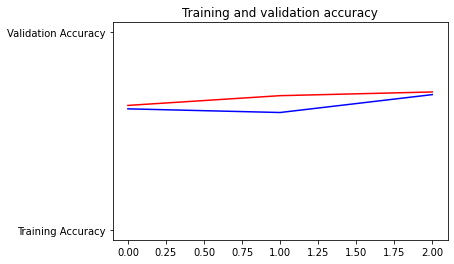

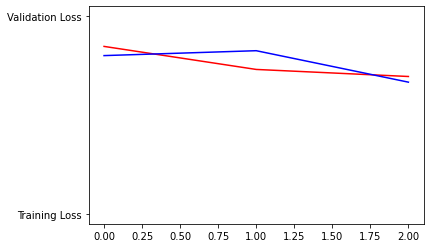

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()